# Working with imperfect data

## Budget Proposed Resources 2017

### https://data.seattle.gov/City-Business/Budget-Proposed-Resources-2017/yakm-xjzg

Just an interesting data set that has to tracks budget expendatures in the seattle of seattle and their proposed budget for the upcoming years.

Questions to determine:
1. How much money gets spent on the arts?
2. How much money goes to SDOT?
3. What is the total 206 budget compared to 2017 proposed?
4. What is the difference between 2015-2016 and 2016-2017?
5. Which depart spend the most money?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Budget_Proposed_Resources_2017.csv', sep=',')


In [3]:
data

,Dept,FundName,RevenueTableCategory,RevenueSourceName,2015 Actuals,2016 Adopted,2017 Proposed,2018 Proposed
0,12LIBLEVY,2012 Library Levy Fund (18100),Levy Revenue,Interest Earnings,110333,50000,100000,50000
1,12LIBLEVY,2012 Library Levy Fund (18100),Levy Revenue,Property Tax,17283986,17340000,17513077,17688208
2,12LIBLEVY,2012 Library Levy Fund (18100),Levy Revenue,Use of (Contribution To) Fund Balance,-1562341,-1482163,1500344,1745362
3,ARTS,Arts Account (00140),Misc Revenues,Interest Earnings,25862,20000,20000,20000
4,ARTS,Municipal Arts Fund (62600),Misc Revenues,Interest Earnings,88995,74986,77235,79552
5,ARTS,Arts Account (00140),Misc Revenues,Interest Increase/Decrease,-2243,0,0,0
6,ARTS,Municipal Arts Fund (62600),Misc Revenues,Interest Increase/Decrease,-9735,0,0,0
7,ARTS,Arts Account (00140),Admission Tax Allocation,Interfund Transfers,5953328,6492924,7914128,9004368
8,ARTS,Arts Account (00140),General Fund,Interfund Transfers,0,1500000,1300000,0
9,ARTS,Arts Account (00140),Misc Revenues,Interfund Transfers,30880,31961,32000,32000


In [4]:
unique_rev_source = data.RevenueSourceName.unique()

In [5]:
unique_rev_source

array(['Interest Earnings', 'Property Tax',
       'Use of (Contribution To) Fund Balance',
       'Interest Increase/Decrease', 'Interfund Transfers',
       'Interfund Transfers (1% for Art)', 'Misc Income', 'Misc Revenues',
       'Public Art Management Fees',
       'Use of/(Contribution to) Fund Balance',
       'Franchise Fee Revenues, Licenses, Permits, and Fines',
       'Use of (Contributions to) Fund Balance', 'Administration',
       'Armory Concessions', 'Campus Commercial Events',
       'Campus Sponsorships', 'CIP', 'Festivals',
       'General Fund - McCaw Hall', 'General Fund - McCaw Hall Debt',
       'General Subfund Support', 'Judgment and Claims Allocation',
       'KeyArena Concessions', 'KeyArena Miscellaneous',
       'KeyArena Premium Seating', 'KeyArena Reimbursables',
       'KeyArena Rent', 'KeyArena Ticketing', 'Leases - Campus Grounds',
       'Leases - Cultural Facilities', 'McCaw Hall Catering & Concessions',
       'McCaw Hall Miscellaneous', 'McCaw Hall

In [6]:
unique_dept = data.Dept.unique()

In [7]:
unique_dept

array(['12LIBLEVY', 'ARTS', 'CBLFEE', 'CEN', 'CRS', 'CWI', 'DEEL', 'DOIT',
       'DPR', 'DPRLEVY', 'EDLEVY', 'ETH', 'FAS', 'FBRL', 'SPL', 'FFL',
       'FISC-RSRV', 'FPEN', 'HSD', 'JC', 'NMF', 'OH', 'PCTF', 'PGF',
       'PPEN', 'RET', 'SCL', 'SDCI', 'SDOT', 'SEAIT', 'SPP', 'SPU',
       'STCAR', 'SZF'], dtype=object)

# 2016 Arts Budget compared to upcoming proposals

### Number of art programs to fund

In [8]:
len(data[data.Dept == 'ARTS'])

14

### Average Cost per art program

In [9]:
data.loc[data['Dept'] == 'ARTS', '2017 Proposed'].mean()

906243.78571428568

In [10]:
art_2017 = data.loc[data['Dept'] == 'ARTS', '2017 Proposed'].sum()
art_2016 = data.loc[data['Dept'] == 'ARTS', '2016 Adopted'].sum()
art_2018 = data.loc[data['Dept'] == 'ARTS', '2018 Proposed'].sum()

In [11]:
art_2017 - art_2016

1390214

In [12]:
art_2018 - art_2017

-211565

## Conclusion:

Arts budget has an proposed increase of 1.3 million from 2016 to 2017 but the 2018 budget is proposing a decrease of $211,565 from 2017 but is still an increase of over $1 million over 2016.

# 2016 SDOT Budget compared to upcoming proposals

In [13]:
len(data[data.Dept == 'SDOT'])

43

In [14]:
sdot_2015 = data.loc[data['Dept'] == 'SDOT', '2015 Actuals'].sum()
sdot_2016 = data.loc[data['Dept'] == 'SDOT', '2016 Adopted'].sum()
sdot_2017 = data.loc[data['Dept'] == 'SDOT', '2017 Proposed'].sum()
sdot_2018 = data.loc[data['Dept'] == 'SDOT', '2018 Proposed'].sum()

In [15]:
sdot_2018 - sdot_2017

120485393

In [16]:
sdot_2017 -  sdot_2016

-50391188

In [17]:
sdot_2016 - sdot_2015

68602094

## Conclusion:

From 2015 to 2016 the budget increased by $6.8 million but is proposed to drop by $5 million for 2017 but then increase an additional $120 million for 2018.

# Annual Budgets totals

In [18]:
total_2015 = data['2015 Actuals'].sum()
total_2016 = data['2016 Adopted'].sum()
total_2017 = data['2017 Proposed'].sum()
total_2018 = data['2018 Proposed'].sum()

In [19]:
budget = [total_2015, total_2016, total_2017, total_2018]
years = [2015, 2016, 2017, 2018]

In [20]:
plot = plt.plot(years, budget, '-ro')

In [21]:
plt.title('Total Budget Per Year')
plt.xlabel('Year')
plt.ylabel('Budget in Billions')

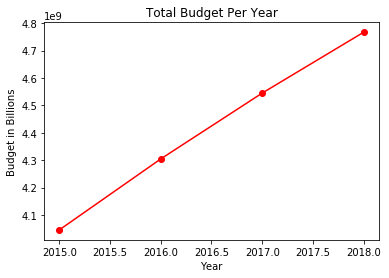

In [22]:
plt.show()

## Conclusion:

The annual budget for the city of seattle seems to be increasing about at a steady pace that is suprisingly curving down yet still increasing every year by around $200 dollars

# Annual budgets compared

In [23]:
from_2015_2016 = total_2015 - total_2016
from_2015_2017 = total_2015 - total_2017
from_2015_2018 = total_2015 - total_2018

from_2016_2017 = total_2016 - total_2017
from_2016_2018 = total_2016 - total_2018

from_2017_2018 = total_2017 - total_2018

### From year to year

In [24]:
from_2015_2016

-258825333

In [25]:
from_2016_2017

-240092447

In [26]:
from_2017_2018

-221850937

### Every Two years

In [27]:
from_2015_2017

-498917780

In [28]:
from_2016_2018

-461943384

## Conclusion:

This shows the numbers that we were looking at in the previous graph.  From each year the budget increases but is increasing at a lower rate.  Budget raised almost $260 million from 2015 - 2016, $240 million from 2016-2017, and $220 million from 2017 - 2018.  These are proposed budgets so it will be interesting to see if they follow through with these numbers.

# Budget by department

In [29]:
data.groupby('Dept').sum()

,2015 Actuals,2016 Adopted,2017 Proposed,2018 Proposed
Dept,,,,
12LIBLEVY,15831978,15907837,19113421,19483570
ARTS,8286762,11297199,12687413,12475848
CBLFEE,8775868,9936381,10353466,10041960
CEN,38648023,38292470,42874753,43956380
CRS,64677964,84705417,96100492,80591731
CWI,3021929,0,1050000,2700000
DEEL,43192075,55011611,64866837,72716886
DOIT,82505289,38784472,0,0
DPR,144588343,155241311,163480689,168282650


## Conclusion:

Well that was easier than expected. Seems lik SCL is the big moey sucker. Can't tell what this is exactly. Seattle City Lights? Has city light fund as its fund name.  Seems like a lot of money on lights! 1.3 to 1.4 billion annually!